In [1]:
import os

from matplotlib.pyplot import legend

os.chdir('../')
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/RandomizedOptimization


In [2]:
%load_ext autoreload
%autoreload 2
from src.utils import plot_nn_fitness_curves, plot_fitness_curve_with_params
from src.utils import load_processed_data, set_plot_style, parse_fitness_curve,plot_parameter_vs_metric

In [3]:
import pandas as pd
import mlrose_ky
from mlrose_ky.neural.neural_network import NeuralNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.model_selection import learning_curve, LearningCurveDisplay
import ast
import warnings


In [4]:
best_results_filename = 'results/nn/spam2/nn_best_results.csv'
results_dir = 'results/nn/spam2/'
fig_dir = 'figures/nn/spam2/'

In [5]:
X_train, X_test, y_train, y_test = load_processed_data('data/spam')

# Best model fitness curves

In [6]:
best_results = pd.read_csv(best_results_filename)

In [7]:
plot_nn_fitness_curves(best_results, fig_dir)

Plot saved as figures/nn/spam2/nn_fitness_curves_vs_problem_size.png


## Loss Curves

### RHC

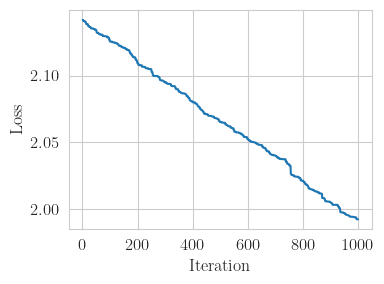

In [8]:
sub_results = best_results[best_results['algorithm']=='random_hill_climb']
set_plot_style()
fitness_value = parse_fitness_curve(sub_results['fitness_curve'][0])
iterations = range(1, len(fitness_value) + 1)
plt.plot(iterations, fitness_value, label='RHC')
plt.xlabel('Iteration')
plt.ylabel('Loss')
#plt.title('RHC: Loss Curve')
plt.tight_layout()
# save
plt.savefig(os.path.join(fig_dir, 'rhc_loss_curve.png'), dpi=600, bbox_inches='tight')

### SA

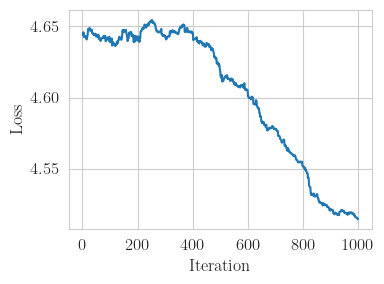

In [9]:
sub_results = best_results[best_results['algorithm']=='simulated_annealing']
set_plot_style()
fitness_value = parse_fitness_curve(sub_results['fitness_curve'][1])
iterations = range(1, len(fitness_value) + 1)
plt.plot(iterations, fitness_value, label='SA')
plt.xlabel('Iteration')
plt.ylabel('Loss')
#plt.title('SA: Loss Curve')
plt.tight_layout()
# save
plt.savefig(os.path.join(fig_dir, 'sa_loss_curve.png'), dpi=600, bbox_inches='tight')

### GA

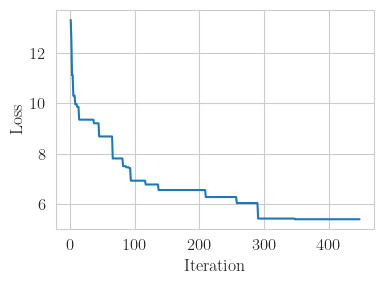

In [10]:
sub_results = best_results[best_results['algorithm']=='genetic_alg']
set_plot_style()
fitness_value = parse_fitness_curve(sub_results['fitness_curve'][2])
iterations = range(1, len(fitness_value) + 1)
plt.plot(iterations, fitness_value, label='GA')
plt.xlabel('Iteration')
plt.ylabel('Loss')
#plt.title('GA: Loss Curve')
plt.tight_layout()
# save
plt.savefig(os.path.join(fig_dir, 'ga_loss_curve.png'), dpi=600, bbox_inches='tight')

## learning curve

### RHC

In [11]:
nn_rhc = NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='random_hill_climb', max_iters=1000, bias=True, is_classifier=True, learning_rate=0.06, early_stopping=True, clip_max=5, max_attempts=100, random_state=42, restarts=10, curve=True)
train_size, train_score, valid_score = learning_curve(estimator=nn_rhc,
                                                      X=X_train,
                                                      y=y_train,
                                                      random_state=42,
                                                      train_sizes=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                      cv=5,scoring='accuracy',
                                                      n_jobs=-3)

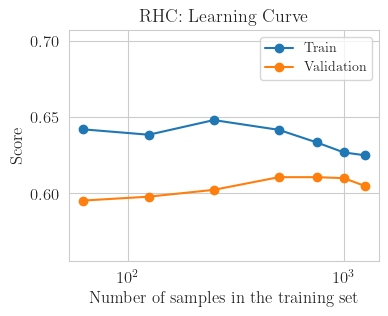

In [12]:
set_plot_style()
display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")
param = { "line_kw" : {"marker":"o"},"std_display_style": "fill_between",
    "fill_between_kw": {"alpha": 0} }
display.plot(**param)

# Modify the legend labels
ax = plt.gca()  # Get the current axes
lines = ax.get_lines()
labels = ['Train', 'Validation']
ax.legend(lines, labels)

plt.title("RHC: Learning Curve")
# save the plot
plt.savefig(os.path.join(fig_dir, 'rhc_learning_curve.png'), dpi=600, bbox_inches='tight')

### SA

In [13]:
nn_sa = NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='simulated_annealing', max_iters=1000, bias=True, is_classifier=True, learning_rate=0.06, early_stopping=True, clip_max=5, max_attempts=10, random_state=42, schedule=mlrose_ky.GeomDecay(), curve=True)
train_size, train_score, valid_score = learning_curve(estimator=nn_sa,
                                                        X=X_train,
                                                        y=y_train,
                                                        random_state=42,
                                                        train_sizes=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                        cv=5,scoring='accuracy',
                                                        n_jobs=-3)

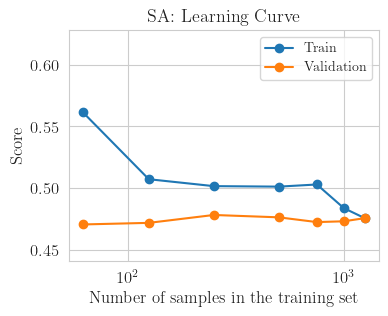

In [14]:
# draw
set_plot_style()
display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")
param = { "line_kw" : {"marker":"o"}, "std_display_style": "fill_between",
    "fill_between_kw": {"alpha": 0} }
display.plot(**param)
# Modify the legend labels
ax = plt.gca()  # Get the current axes
lines = ax.get_lines()
labels = ['Train', 'Validation']
ax.legend(lines, labels)

plt.title("SA: Learning Curve")
# save the plot
plt.savefig(os.path.join(fig_dir, 'sa_learning_curve.png'), dpi=600, bbox_inches='tight')

### GA

In [15]:
nn_ga = NeuralNetwork(hidden_nodes=[10], activation='relu', algorithm='genetic_alg', max_iters=1000, bias=True, is_classifier=True, learning_rate=0.06, early_stopping=True, clip_max=5, max_attempts=10, random_state=42, pop_size=200, mutation_prob=0.1, curve=True)
train_size, train_score, valid_score = learning_curve(estimator=nn_ga,
                                                        X=X_train,
                                                        y=y_train,
                                                        random_state=42,
                                                        train_sizes=[0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1],
                                                        cv=5,scoring='accuracy',
                                                        n_jobs=-3)

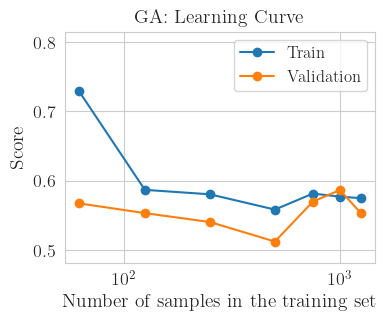

In [16]:
# draw
set_plot_style()
display = LearningCurveDisplay(train_sizes=train_size,
                               train_scores=train_score,
                               test_scores=valid_score,
                            score_name="Score")
param = { "line_kw" : {"marker":"o"}, "std_display_style": "fill_between",
    "fill_between_kw": {"alpha": 0} }
display.plot(**param)
# Modify the legend labels
ax = plt.gca()  # Get the current axes
lines = ax.get_lines()
labels = ['Train', 'Validation']
ax.legend(lines, labels)
plt.title("GA: Learning Curve")
# save the plot
plt.savefig(os.path.join(fig_dir, 'ga_learning_curve.png'), dpi=600, bbox_inches='tight')



# Hyperparameter plots

In [17]:
results = pd.read_csv('results/nn/spam2/nn_full_results.csv')

## GA

In [18]:
sub_results = results[results['algorithm']=='genetic_alg']
sub_results['params'] = sub_results['params'].apply(ast.literal_eval)
# split the params into separate columns
params_df = sub_results['params'].apply(pd.Series)
sub_results = pd.concat([sub_results, params_df], axis=1)

In [19]:
plot_parameter_vs_metric(sub_results, 'genetic_alg','mutation_prob','val_accuracy', 'pop_size'  , fig_dir)

Plot saved as figures/nn/spam2/genetic_alg_val_accuracy_vs_mutation_prob_vs_problem_size.png


## RHC

In [ ]:
sub_results = results[results['algorithm']=='random_hill_climb']
sub_results['params'] = sub_results['params'].apply(ast.literal_eval)
# split the params into separate columns
params_df = sub_results['params'].apply(pd.Series)
sub_results = pd.concat([sub_results, params_df], axis=1)
plot_parameter_vs_metric(sub_results, 'random_hill_climb', 'restarts','val_accuracy',output_dir=fig_dir)

## SA

In [137]:
sub_results = results[results['algorithm']=='simulated_annealing']
sub_results['params'] = sub_results['params'].apply(ast.literal_eval)
# split the params into separate columns
params_df = sub_results['params'].apply(pd.Series)
sub_results = pd.concat([sub_results, params_df], axis=1)
plot_parameter_vs_metric(sub_results, 'simulated_annealing', 'max_attempts','val_accuracy',  'schedule', fig_dir)

ValueError: malformed node or string on line 1: <ast.Call object at 0x130d34ee0>